Swiggy is an Indian online food ordering and delivery platform. Founded in 2014, Swiggy is headquartered in Bangalore and operates in more than 500 Indian cities as of September 2021. Besides food delivery, the platform also provides on-demand grocery deliveries under the name Instamart, and same-day package delivery service called Swiggy Genie.

**Load the Important Libraries**

In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import plotly.express as px
import plotly.offline as pyo
import json



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/swiggy-restaurants-dataset/data.json
/kaggle/input/swiggy-restaurants-dataset/swiggy.csv


# Gathering Data

In [48]:
df = pd.read_csv('/kaggle/input/swiggy-restaurants-dataset/swiggy.csv')

# Data Preparation

In [49]:
type(df)

pandas.core.frame.DataFrame

In [50]:
df.head(5)

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json


In [51]:
df. tail(5)

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
148536,553122,The Food Delight,Yavatmal,--,Too Few Ratings,₹ 200,"Fast Food,Snacks",21522053000452,https://www.swiggy.com/restaurants/the-food-de...,"The Food Delight, 94MC+X35, New Singhania Naga...",Menu/553122.json
148537,562647,MAITRI FOODS & BEVERAGES,Yavatmal,--,Too Few Ratings,₹ 300,Pizzas,license,https://www.swiggy.com/restaurants/maitri-food...,"MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY...",Menu/562647.json
148538,559435,Cafe Bella Ciao,Yavatmal,--,Too Few Ratings,₹ 300,"Fast Food,Snacks",21522251000378,https://www.swiggy.com/restaurants/cafe-bella-...,"Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S...",Menu/559435.json
148539,418989,GRILL ZILLA,Yavatmal,--,Too Few Ratings,₹ 250,Continental,21521251000241,https://www.swiggy.com/restaurants/grill-zilla...,"GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT...",Menu/418989.json
148540,447770,Lazeez kitchen,Yavatmal,--,Too Few Ratings,₹ 200,Pizzas,21521251000634,https://www.swiggy.com/restaurants/lazeez-kitc...,"Lazeez kitchen, 94G3+2RR, Wadgaon, Yavatmal, M...",Menu/447770.json


In [52]:
df.shape


(148541, 11)

In [53]:
df.city.nunique()

821

In [54]:
df.city.unique()

array(['Abohar', 'Adilabad', 'Adityapur', 'Adoni', 'Agartala', 'Agra',
       'Vastrapur,Ahmedabad', 'GOTA,Ahmedabad',
       'Paldi & Ambawadi,Ahmedabad', 'Ghatlodia,Ahmedabad',
       'Bopal,Ahmedabad', 'Gandhinagar,Ahmedabad', 'LalDarwaja,Ahmedabad',
       'Naranpura,Ahmedabad', 'Navrangpura,Ahmedabad',
       'Science City,Ahmedabad', 'Maninagar,Ahmedabad',
       'Chandkheda,Ahmedabad', 'Ahmednagar', 'Aizawl', 'Ajmer', 'Akola',
       'Alappuzha', 'Aligarh', 'Alipurduar', 'Allahabad', 'Alwar',
       'Ambala', 'Ambikapur', 'Ambur', 'Amravati', 'Amreli', 'Amritsar',
       'Anand', 'Anantapur', 'Ankleshwar', 'Arakkonam', 'Arambagh',
       'Arrah', 'Aruppukottai', 'Asansol', 'Aurangabad',
       'Aurangabad_bihar', 'Azamgarh', 'Baddi', 'Bagalkot', 'Bagdogra',
       'Bahadurgarh', 'Bahraich', 'Balaghat', 'Balangir', 'Balasore',
       'Ballari', 'Balrampur', 'Balurghat', 'Banda',
       'Yeshwanthpur,Bangalore', 'Geddalahalli,Bangalore',
       'Koramangala,Bangalore', 'JP Nagar,B

In [55]:
df.describe()

,id
count,148541.000000
mean,363466.378912
std,167890.977174
min,211.000000
25%,233320.000000
50%,412628.000000
75%,502223.000000
max,581031.000000


# **Data Cleaning**

Its important to remove duplicate rows to avoid biasness in our analysis. Since id is unique identifier of our restaurants, we can use it to remove duplicates.

In [56]:
df = df.rename(columns={'Unnamed: 0':'id'})
df.drop_duplicates(subset='id', keep='first', inplace = True)
#df.set_index('id', inplace=True)
df.shape

(148541, 11)

In [57]:
Null = df.isnull().sum().reset_index().rename({0:'Null'}, axis = 1)
Null['% Null'] = round((Null['Null']/df.shape[0])*100, 0)
Null.sort_values(by='% Null', ascending = False).style.background_gradient()

,index,Null,% Null
0,id,0,0.000000
1,name,86,0.000000
2,city,0,0.000000
3,rating,86,0.000000
4,rating_count,86,0.000000
5,cost,131,0.000000
6,cuisine,99,0.000000
7,lic_no,229,0.000000
8,link,0,0.000000
9,address,86,0.000000


In [58]:
df = df.drop(['link','lic_no'], axis =1)
df.dropna(inplace = True, axis = 0)
df.reset_index(inplace = True)
df.drop(['index'], axis = 1, inplace = True)
df.shape

(148398, 9)

# Exploratory Data Analysis

In [59]:
Rating = []
for i in range(df.shape[0]):
    try:
        Rating.append(float(df.rating[i]))     
    except:
        #print(Data.rating[i])
        if df.rating[i] == '--' or 'NA':
            Rating.append(np.NaN)                # Where rating is not givem keep it null
        else:
            print(df.rating[i])
print(len(Rating))
print(df.shape[0])
df.rating = Rating
df.rating.dtypes

148398
148398


dtype('float64')

In [60]:
df.isnull().sum()

id                  0
name                0
city                0
rating          86977
rating_count        0
cost                0
cuisine             0
address             0
menu                0
dtype: int64

 **Restaurant with maximum ratings**

In [61]:
print('The maximum rating Restaurant are:')
df[df.rating == df.rating.max()][['name','rating']]

The maximum rating Restaurant are:


,name,rating
752,Pablo Premium Kitchen,5.0
1014,The best diet corner,5.0
9686,Creams and Bites,5.0
9734,Bansal's Thali & Combo Meals,5.0
10158,GOWHEY- HEALTHY DESSERT COMPANY,5.0
...,...,...
140593,Chenab Kitchen,5.0
146122,Cream House,5.0
147291,HINDUSTANI BURGER,5.0
147292,KEBAB NATION,5.0


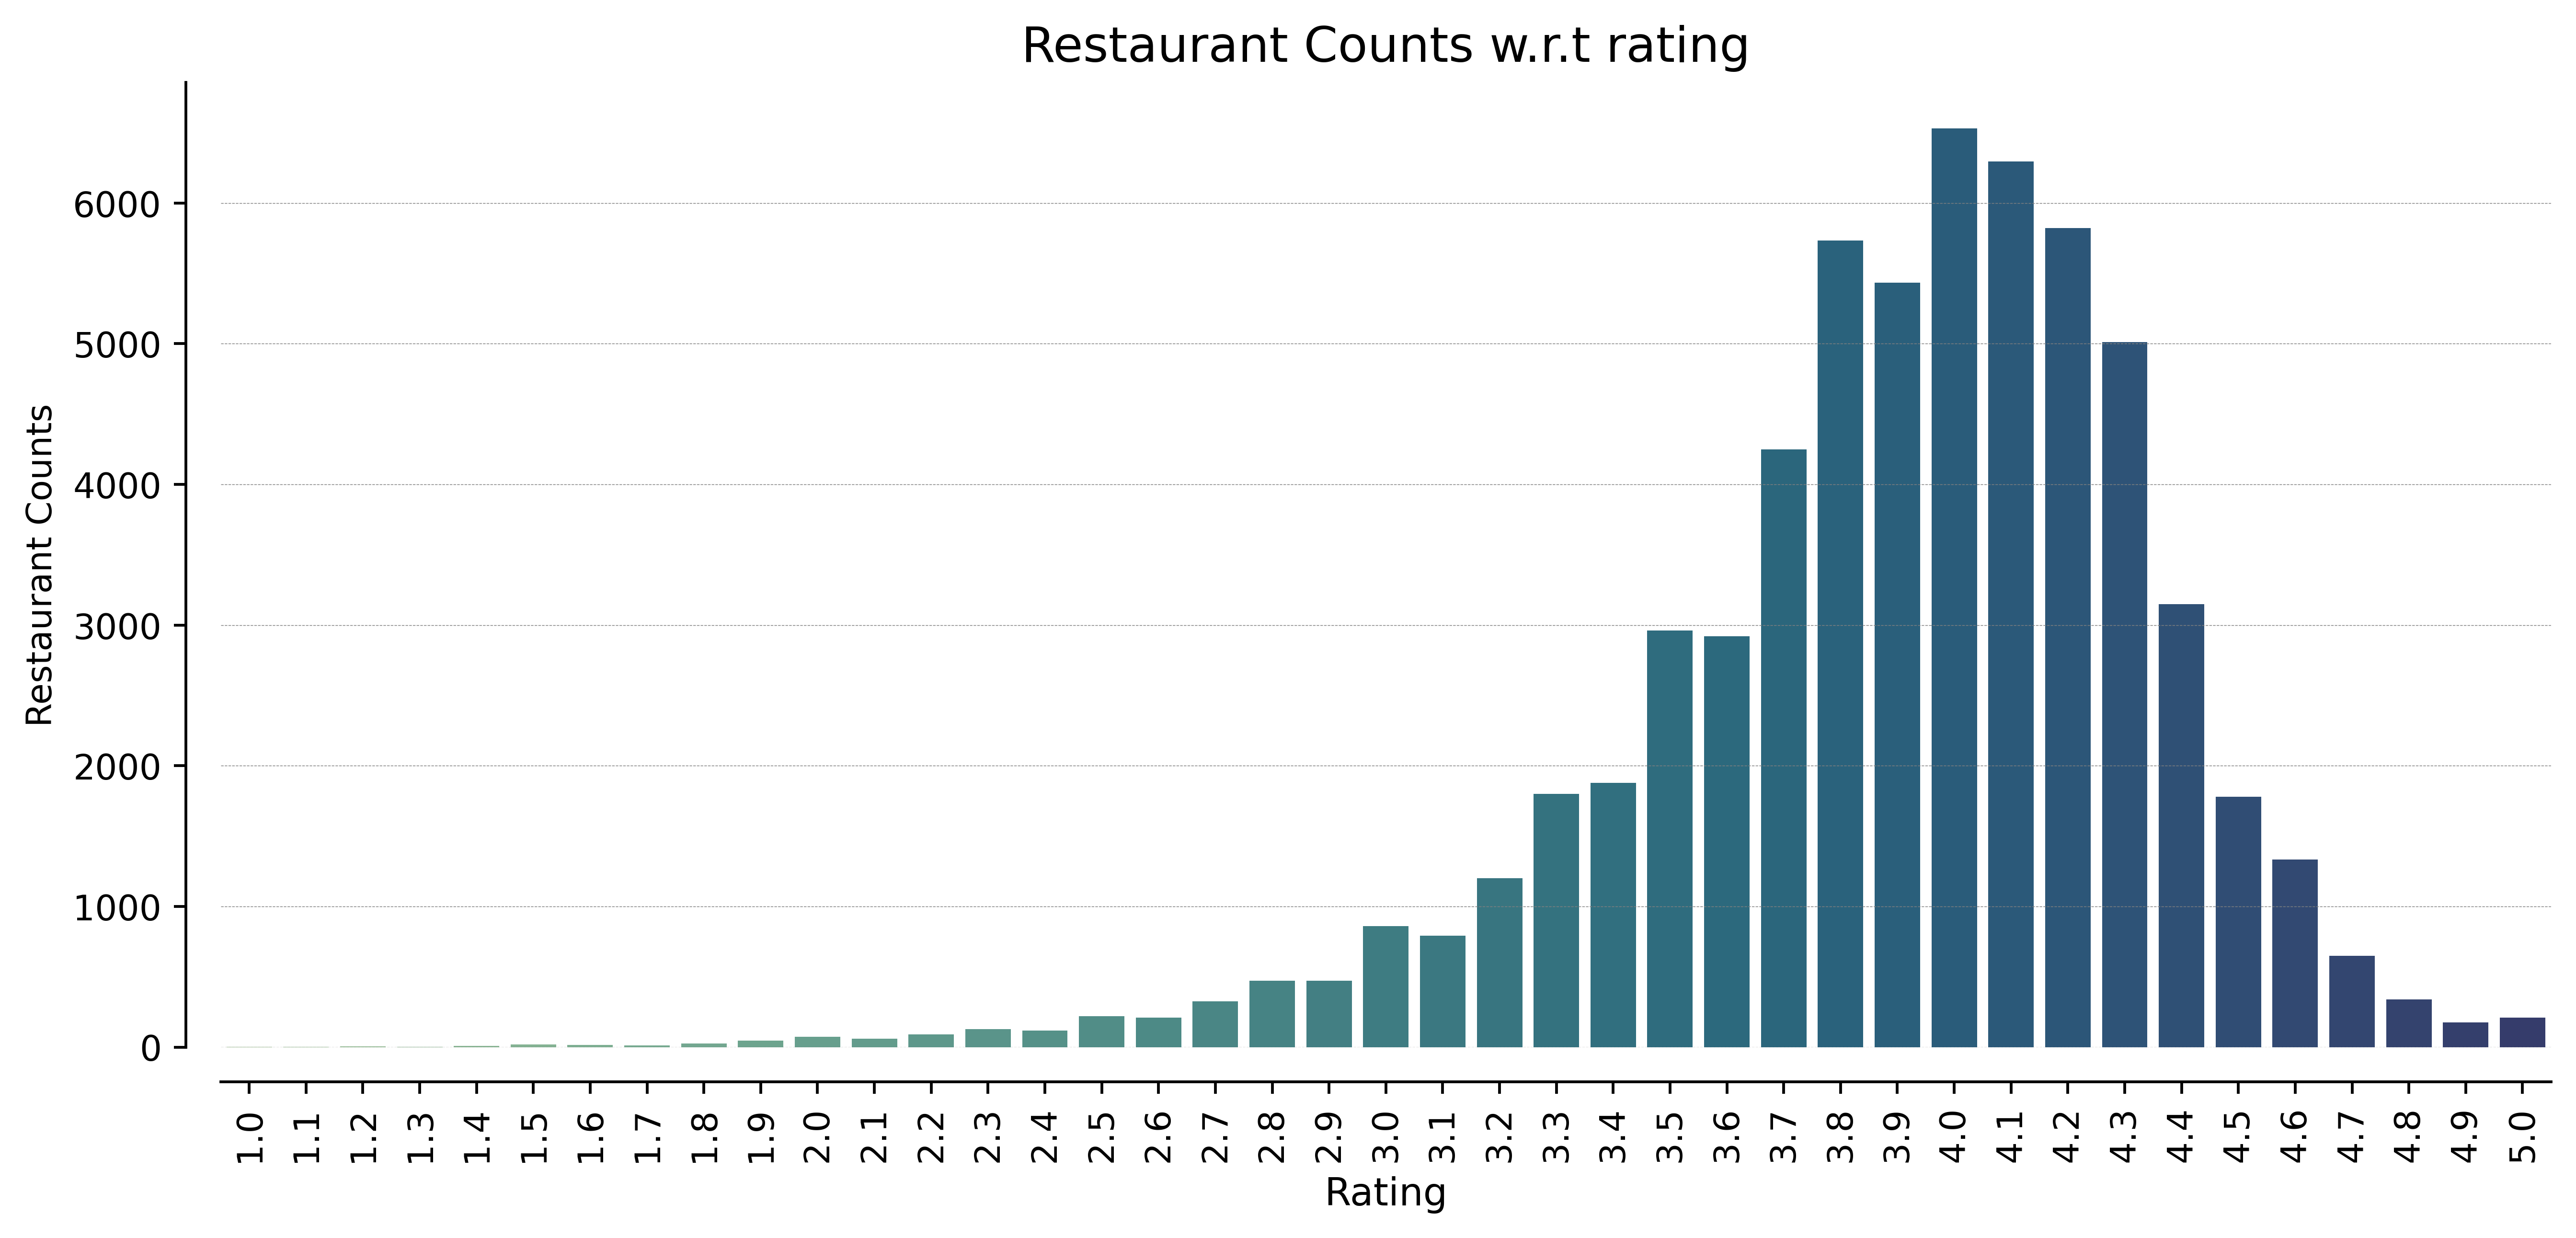

In [62]:
data = df.groupby('rating', as_index = False).agg('count')[['rating','name']]

# Adjust the size and view of plot
plt.figure(figsize=(12,5), dpi=523)   

#sns.set_style('whitegrid') 

# Seaborn Bar plot
sns.barplot(data = data,
           x='rating',
           y = 'name',
           palette= "crest"#'plasma'
          )     


# Set horizontal grid lines
plt.grid(True, axis = 'y',                                                 
         color = 'gray', 
         linestyle = '--',  
         linewidth=0.2
        ) 

# Remove vertical grid lines
plt.grid(False, axis = 'x')                                   

# Remove boundry line, set Offset & trim the corner
sns.despine(offset=10, trim=False)

# Rotate the x tick value by 90 degree for better view
plt.xticks(rotation = 90)                                     

plt.xlabel("Rating", fontsize = 11)                                # Set X label         
plt.ylabel("Restaurant Counts", fontsize = 10)                     # Set Y label
plt.title('Restaurant Counts w.r.t rating', fontsize = 14)         # Set title
plt.show()

In [63]:
R = df.groupby('rating', as_index = False).agg('count').rename({'name':'R_Counts'}, axis=1)[['rating','R_Counts']]

R = {'<1.0':R[R['rating']<=1.0].R_Counts.sum(),
    '1.1-2.0':R[(R['rating']>1.0) & (R['rating']<=2.0)].R_Counts.sum(),
    '2.1-3.0':R[(R['rating']>2.0) & (R['rating']<=3.0)].R_Counts.sum(),
    '3.1-4.0':R[(R['rating']>3.0) & (R['rating']<=4.0)].R_Counts.sum(),
    '4.1-5.0':R[(R['rating']>4.0) & (R['rating']<=5.0)].R_Counts.sum()
    }

R = pd.DataFrame((R.keys(),R.values()), index=['Rating', 'Counts']).T

***1. Chains vs Single***

The comparison between single outlets and restaurant chains to understand the business for collaborating with the new outlets.  

In [65]:
outlets = df["name"].value_counts()
outlets

Domino's Pizza                                     442
Pizza Hut                                          319
KFC                                                309
Kwality Walls Frozen Dessert and Ice Cream Shop    300
Baskin Robbins                                     274
                                                  ... 
Seema Healthy Kitchen                                1
SARANSH DI HATTI                                     1
FEEDME                                               1
Doojee                                               1
Lazeez kitchen                                       1
Name: name, Length: 112772, dtype: int64

In [66]:
chains = outlets[outlets >= 2]
single = outlets[outlets == 1]

In [67]:
chains

Domino's Pizza                                     442
Pizza Hut                                          319
KFC                                                309
Kwality Walls Frozen Dessert and Ice Cream Shop    300
Baskin Robbins                                     274
                                                  ... 
Toast 99 Dosa                                        2
Hotel Mayura                                         2
THE ALCOVE                                           2
The Burger Craft                                     2
Red Pepper                                           2
Name: name, Length: 10642, dtype: int64

In [68]:
single

SHEELA FOOD EXPRESS            1
Tashan Restaurant              1
Seasonal's Natural             1
Friends Fast Food & Chinese    1
Chai House Cafe                1
                              ..
Seema Healthy Kitchen          1
SARANSH DI HATTI               1
FEEDME                         1
Doojee                         1
Lazeez kitchen                 1
Name: name, Length: 102130, dtype: int64

In [69]:
print("Total Restaurants = ", df.shape[0])
print("Total Restaurants that are part of some chain = ", df.shape[0] - single.shape[0])
print("Percentage of Restaurants that are part of a chain = ", np.round((df.shape[0] - single.shape[0]) / df.shape[0],2)*100, "%")

Total Restaurants =  148398
Total Restaurants that are part of some chain =  46268
Percentage of Restaurants that are part of a chain =  31.0 %


**2**. **Top 5 Restaurant Chains**

In [70]:
top5_chains = df["name"].value_counts()[:5].sort_values(ascending=True)

In [71]:
chains.head(5)

Domino's Pizza                                     442
Pizza Hut                                          319
KFC                                                309
Kwality Walls Frozen Dessert and Ice Cream Shop    300
Baskin Robbins                                     274
Name: name, dtype: int64

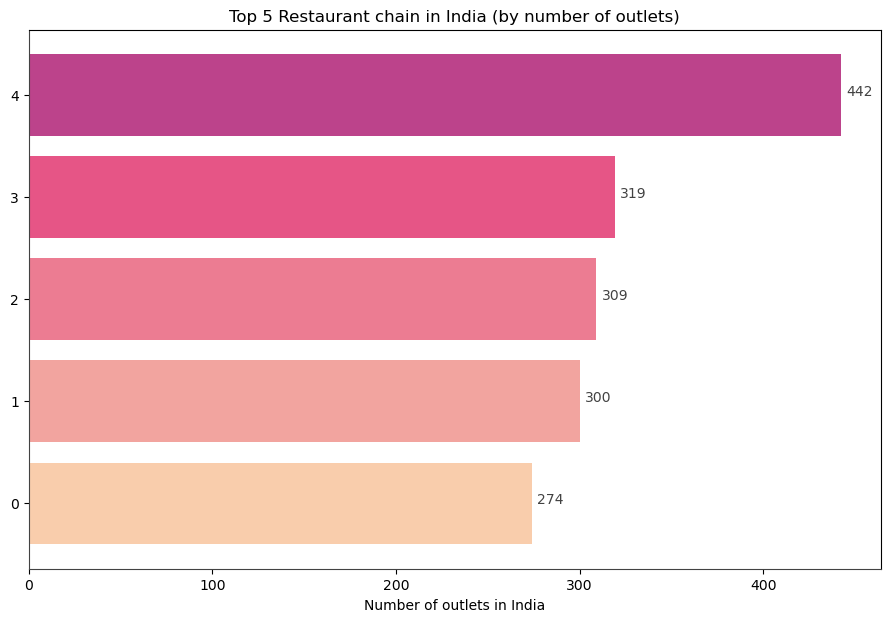

In [72]:
height = top5_chains.values
bars = top5_chains.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible("#424242")
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

colors = ["#f9cdac","#f2a49f","#ec7c92","#e65586","#bc438b","#933291","#692398","#551c7b","#41155e","#2d0f41"]
plt.barh(y_pos, height, color=colors)
 
plt.xlabel("Number of outlets in India")

for i, v in enumerate(height):
    ax.text(v+3, i, str(v), color='#424242')
plt.title("Top 5 Restaurant chain in India (by number of outlets)")


plt.show()

**3. Restaurant and count of ratings**

In [64]:
fig = px.pie(R,
       names='Rating',
       values='Counts',
       labels={'Counts':'Restaurant Counts'},
       color_discrete_sequence=px.colors.sequential.Electric,
       hole=.5,
       title='<b> Restaurant Counts based on Rating<b>'
      )

fig.show()
pyo.plot(fig, filename = 'Restaurants Counts as per Rating.html', auto_open = True)

'Restaurants Counts as per Rating.html'

**4. Most Popular Cuisines Served**

In [74]:
df.cuisine.unique()

array(['Beverages,Pizzas', 'Sweets,Bakery', 'Beverages', ...,
       'Biryani,Thai', 'South American,Andhra',
       'Barbecue,Italian-American'], dtype=object)

In [73]:
print("Total number of unique cuisines = ", df.cuisine.nunique())

Total number of unique cuisines =  2132


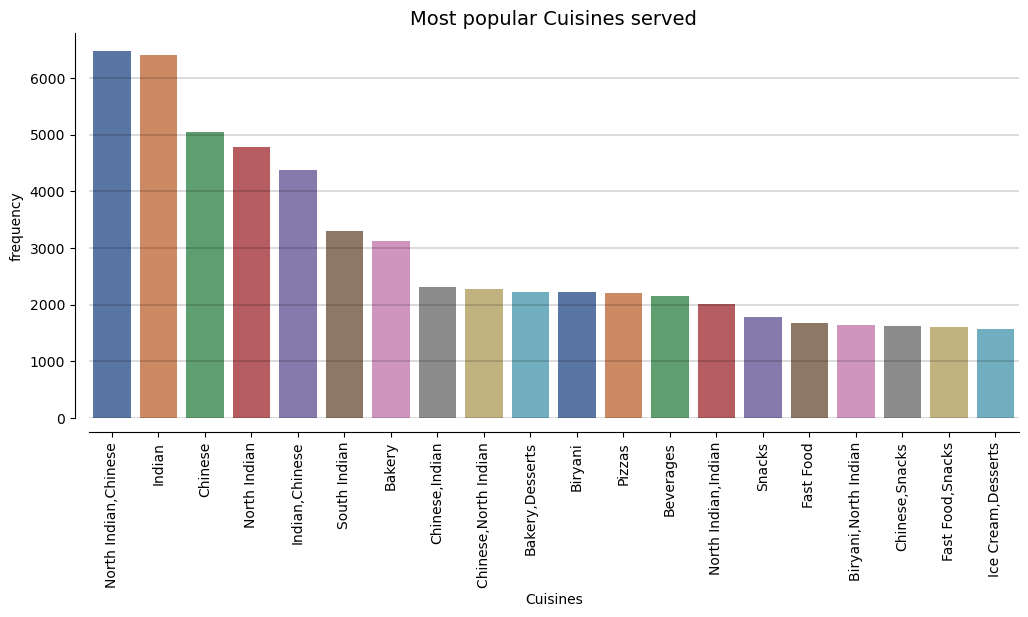

In [75]:
c = df.cuisine.value_counts().reset_index().rename({'index':'Cuisine','cuisine':'frequency'}, axis =1)

plt.figure(figsize=(12,5))                                       

#color of graph
sns.barplot(data = c.head(20),
           x='Cuisine',
           y = 'frequency',
           palette= "deep", 
          )     


#differentiating lines
plt.grid(True, axis = 'y',                                                 
         color = 'black', 
         linestyle = '-',  
         linewidth=0.2
        ) 

plt.grid(False, axis = 'x')                                   

#rotate the x-axis labels        
sns.despine(offset=10, trim=False)
plt.xticks(rotation = 90) 

#fontsize
plt.xlabel("Cuisines", fontsize = 10)                                          
plt.ylabel("frequency", fontsize = 10)                                  
plt.title('Most popular Cuisines served', fontsize = 14)                
plt.show()


In [76]:
df = df.dropna()

In [77]:
df.sort_values(by = ['city','cost'], ascending=False)

,id,name,city,rating,rating_count,cost,cuisine,address,menu
68152,430818,Dhaba Estd 1986 Delhi,"sohna road,Gurgaon",4.0,20+ ratings,₹ 900,"Biryani,Hyderabadi","Dhaba Estd 1986 Delhi, Ground Floor,World Mark...",Menu/430818.json
67997,183115,Theobroma,"sohna road,Gurgaon",4.4,1K+ ratings,₹ 800,"Bakery,Desserts","Theobroma, Baani Square, Shop No. G-6, GroundF...",Menu/183115.json
68021,242468,Cafe Delhi Heights,"sohna road,Gurgaon",4.0,100+ ratings,₹ 800,"Continental,American","Cafe Delhi Heights, Cafe Delhi Heights, 223A, ...",Menu/242468.json
68115,33089,Fat Lulu's Pizza,"sohna road,Gurgaon",3.9,100+ ratings,₹ 800,"Pizzas,Italian","Fat Lulu's Pizza, SCO 133 1st floor, huda mar...",Menu/33089.json
68252,428957,Fabcafe By Fabindia,"sohna road,Gurgaon",4.1,20+ ratings,₹ 800,"North Indian,Healthy Food","Fabcafe By Fabindia, Unit no. 1 C, and 01, Gro...",Menu/428957.json
...,...,...,...,...,...,...,...,...,...
74344,38675,Softy Den,"Abids & Koti,Hyderabad",4.1,100+ ratings,₹ 150,Beverages,"Softy Den, #5-9-303, Ground Floor, Next to Ros...",Menu/38675.json
74260,6745,Tibbs Frankie,"Abids & Koti,Hyderabad",4.3,100+ ratings,₹ 140,"Snacks,Indian","Tibbs Frankie, Ground Floor, Below Big Bazar, ...",Menu/6745.json
74253,82818,Lavish Corner,"Abids & Koti,Hyderabad",3.9,500+ ratings,₹ 120,"Chinese,Indian","Lavish Corner, 5-9-88/1, Saphire Complex, Chap...",Menu/82818.json
74249,10251,Amay Tiffin Corner (Amul),"Abids & Koti,Hyderabad",3.9,1K+ ratings,₹ 100,South Indian,"Amay Tiffin Corner (Amul), #Shop No: 4/210/1/D...",Menu/10251.json


# **Analysis on Rating vs Cost Performance of top 2 cities from Tier 1, Tier 2 and Tier 3 Categories**

**5.** Comparison between Tier1, Tier 2 and Tier 3 Cities. 

The online food delivery and takeaway market is anticipated to develop at a CAGR of 15.25 percent through 2021, according to the NRAI Food and Services Report 2019. The food and beverage sector is anticipated to increase at a pace of 10% yearly. Many food aggregators saw an opening and made the decision to take their companies into smaller locations. Swiggy is anticipated to use a two-step approach, working first with eateries to collaborate and teach them before concentrating on expanding the restaurant's reach. In order to bridge the status gap between metropolitan areas and tier-II/tier-III cities, restaurant personnel would need to undergo extensive training. The key focus for this analysis is to compare the swiggy's performance in tier 2 and tier 3 cities, also to look in the areas for expansion of the business.


**Emerging Tier 1 City- "Bangalore"**

In [78]:
df.city.replace(['Yeshwanthpur,Bangalore','Bangalore',],'Bangalore',inplace=True)
df.city.replace(['Geddalahalli,Bangalore','Bangalore'],'Bangalore',inplace=True)
df.city.replace(['Koramangala,Bangalore','Bangalore',],'Bangalore',inplace=True)
df.city.replace(['JP Nagar,Bangalore','Bangalore'],'Bangalore',inplace=True)
df.city.replace(['HSR,Bangalore',],'Bangalore''Bangalore',inplace=True)
df.city.replace(['Arekere,Bangalore','Bangalore',],'Bangalore',inplace=True)
df.city.replace(['Yeshwanthpur,Bangalore','Bangalore',],'Vadodara',inplace=True)
df.city.replace(['Indiranagar,Bangalore','Bangalore',],'Bangalore',inplace=True)
df.city.replace(['Banashankari,Bangalore','Bangalore',],'Bangalore',inplace=True)
df.city.replace(['Whitefield,Bangalore','Bangalore',],'Bangalore',inplace=True)


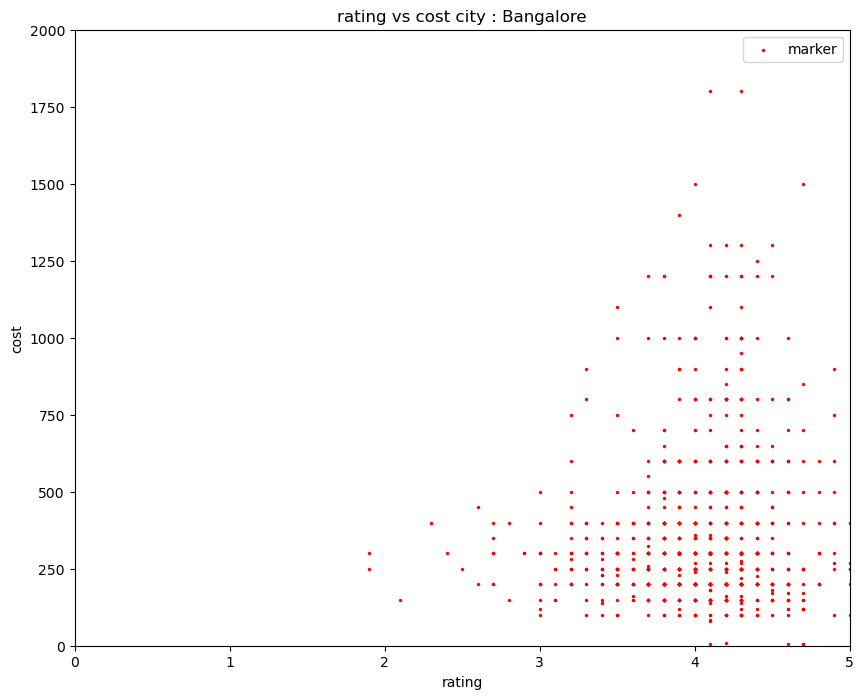

In [79]:
plt.figure(figsize=(10,8)),

#this line should be run onetime only, Once starting over run below line of code
df['cost'] = df['cost'].str.replace('₹', '').astype(int)

specific_city = "Bangalore"

df1_subset= df[df["city"]== specific_city]

#Below line is sorting by cost for original daraframe that is df not for specific city it will give output for all values in the dataset
# df_sorted = df.sort_values(by='cost')

#Below line is sorting by cost for specific city
df_sorted = df1_subset.sort_values(by='cost')

# x-axis values
x = df_sorted["rating"].values
# y-axis values
y = df_sorted["cost"].values

# plotting points as a scatter plot
plt.scatter(x, y, label= "marker", s=2, color= "red")

# x-axis label
plt.xlabel('rating')
# frequency label
plt.ylabel('cost')
# plot title
plt.title('rating vs cost')

plt.xlim(0, 5)
plt.ylim(0,2000)
#plt.grid(True)

#Adding Title
plt.title(f'rating vs cost city : {specific_city}')

# showing legend
plt.legend()

# function to show the plot
plt.show()


**Emerging Tier 1 City- Pune**

In [80]:
df.city.replace(['Yeshwanthpur,Pune','Pune',],'Pune',inplace=True)
df.city.replace(['Wanowrie,Pune','Pune',],'Pune',inplace=True)
df.city.replace(['Koregaon Park,Pune',],'Pune',inplace=True)
df.city.replace(['Hadapsar,Pune','Pune',],'Pune',inplace=True)
df.city.replace(['Warje,Pune','Pune',],'Pune',inplace=True)
df.city.replace(['Pimple Saudagar,Pune','Pune',],'Pune',inplace=True)
df.city.replace(['Kothrud,Pune','Pune',],'Pune',inplace=True)
df.city.replace(['Vishrantwadi,Pune','Pune',],'Pune',inplace=True)

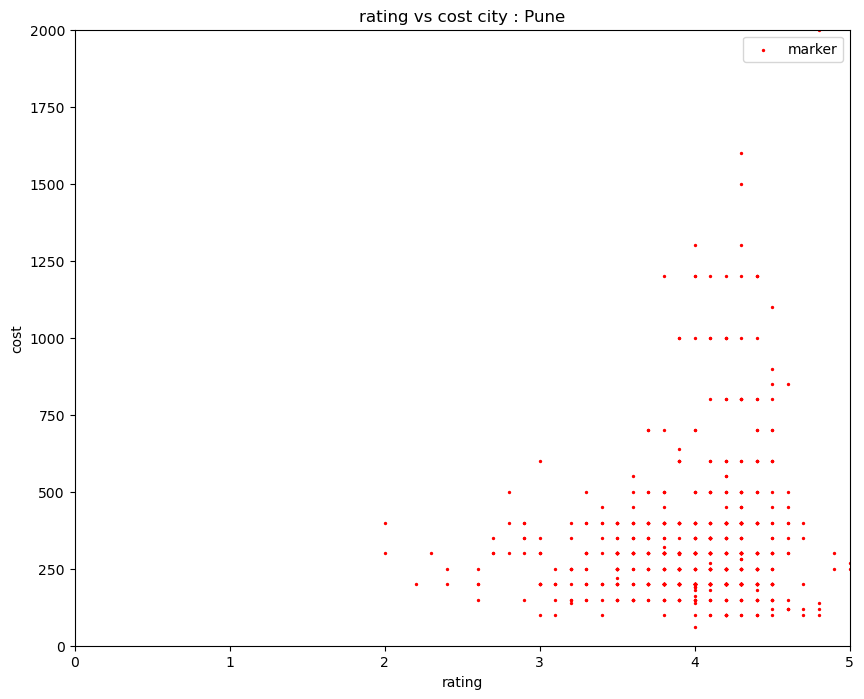

In [81]:
plt.figure(figsize=(10,8)),

#this line should be run onetime only, Once starting over run below line of code
#df['cost'] = df['cost'].str.replace('₹', '').astype(int)

specific_city = "Pune"

df1_subset= df[df["city"]== specific_city]

#Below line is sorting by cost for original daraframe that is df not for specific city it will give output for all values in the dataset
# df_sorted = df.sort_values(by='cost')

#Below line is sorting by cost for specific city
df_sorted = df1_subset.sort_values(by='cost')

# x-axis values
x = df_sorted["rating"].values
# y-axis values
y = df_sorted["cost"].values

# plotting points as a scatter plot
plt.scatter(x, y, label= "marker", s=2, color= "red")

# x-axis label
plt.xlabel('rating')
# frequency label
plt.ylabel('cost')
# plot title
plt.title('rating vs cost')

plt.xlim(0, 5)
plt.ylim(0,2000)
#plt.grid(True)

#Adding Title
plt.title(f'rating vs cost city : {specific_city}')

# showing legend
plt.legend()

# function to show the plot
plt.show()


**Emerging Tier 2 City-Ahmedabad**

In [82]:
df.city.replace(['Vastrapur,Ahmedabad','Ahmedabad',],'Ahmedabad',inplace=True)
df.city.replace(['GOTA,Ahmedabad','Ahmedabad',],'Ahmedabad',inplace=True)
df.city.replace(['Vastrapur,Ahmedabad','Ahmedabad',],'Ahmedabad',inplace=True)
df.city.replace(['Ghatlodia,Ahmedabad','Ahmedabad',],'Ahmedabad',inplace=True)
df.city.replace(['Bopal,Ahmedabad','Ahmedabad',],'Ahmedabad',inplace=True)
df.city.replace(['Gandhinagar,Ahmedabad','Ahmedabad',],'Ahmedabad',inplace=True)
df.city.replace(['Naranpura,Ahmedabad','Ahmedabad',],'Ahmedabad',inplace=True)

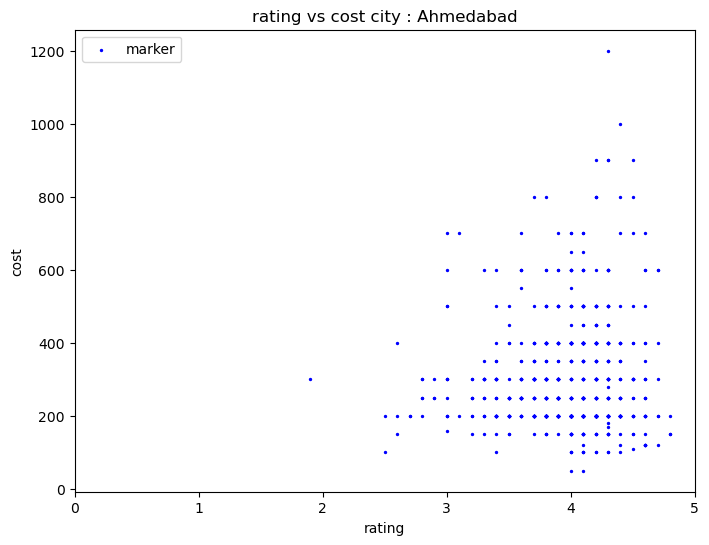

In [83]:
plt.figure(figsize=(8,6)),

#this line should be run onetime only, Once starting over run below line of code
#df['cost'] = df['cost'].str.replace('₹', '').astype(int)

specific_city = "Ahmedabad"

df1_subset= df[df["city"]== specific_city]

#Below line is sorting by cost for original daraframe that is df not for specific city it will give output for all values in the dataset
# df_sorted = df.sort_values(by='cost')

#Below line is sorting by cost for specific city
df_sorted = df1_subset.sort_values(by='cost')

# x-axis values
x = df_sorted["rating"].values
# y-axis values
y = df_sorted["cost"].values

# plotting points as a scatter plot
plt.scatter(x, y, label= "marker", s=2, color= "blue")

# x-axis label
plt.xlabel('rating')
# frequency label
plt.ylabel('cost')
# plot title
plt.title('rating vs cost')

plt.xlim(0, 5)
# plt.ylim(0,10)
#plt.grid(True)

#Adding Title
plt.title(f'rating vs cost city : {specific_city}')

# showing legend
plt.legend()

# function to show the plot
plt.show()


**Emerging Tier 2 City- Kochi**

In [84]:
df.city.replace(['Vyttila,Kochi','Kochi',],'Kochi',inplace=True)
df.city.replace(['Kalamassery,Kochi','Kochi'],'Kochi',inplace=True)
df.city.replace(['Aluva,Kochi','Kochi',],'Kochi',inplace=True)
df.city.replace(['Panampilly Nagar,Kochi','Kochi',],'Kochi',inplace=True)
df.city.replace(['Lulu Mall,Kochi','Kochi'],'Kochi',inplace=True)
df.city.replace(['Fort Kochi,Kochi','Kochi',],'Kochi',inplace=True)
df.city.replace(['Thrippunithura,Kochi','Kochi',],'Kochi',inplace=True)

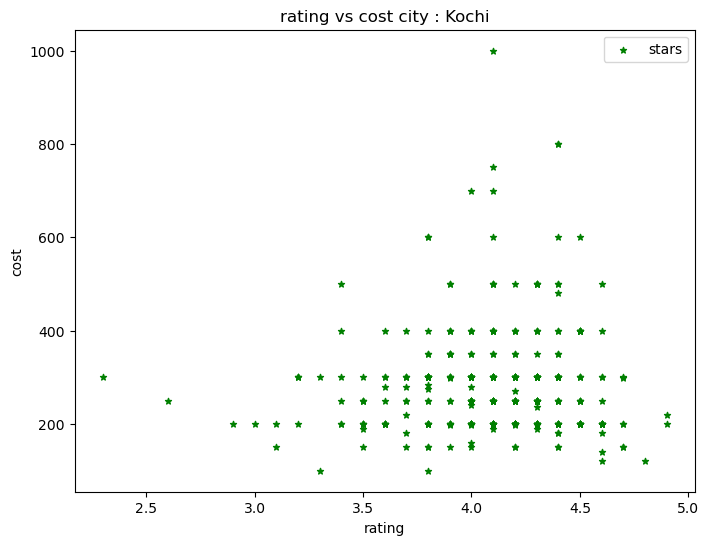

In [85]:
plt.figure(figsize=(8,6)),

#this line should be run onetime only, Once starting over run below line of code
#df['cost'] = df['cost'].str.replace('₹', '').astype(int)

specific_city = "Kochi"

df1_subset= df[df["city"]== specific_city]

#Below line is sorting by cost for original daraframe that is df not for specific city it will give output for all values in the dataset
# df_sorted = df.sort_values(by='cost')

#Below line is sorting by cost for specific city
df_sorted = df1_subset.sort_values(by='cost')

# x-axis values
x = df_sorted["rating"].values
# y-axis values
y = df_sorted["cost"].values

# plotting points as a scatter plot
plt.scatter(x, y, label= "stars", color= "green",marker= "*", s=20)

# x-axis label
plt.xlabel('rating')
# frequency label
plt.ylabel('cost')
# plot title
plt.title('rating vs cost')

# plt.xlim(0, 5)
# plt.ylim(0,10)
#plt.grid(True)

#Adding Title
plt.title(f'rating vs cost city : {specific_city}')

# showing legend
plt.legend()

# function to show the plot
plt.show()


**Emerging Tier 3 City- Bhubaneshwar**

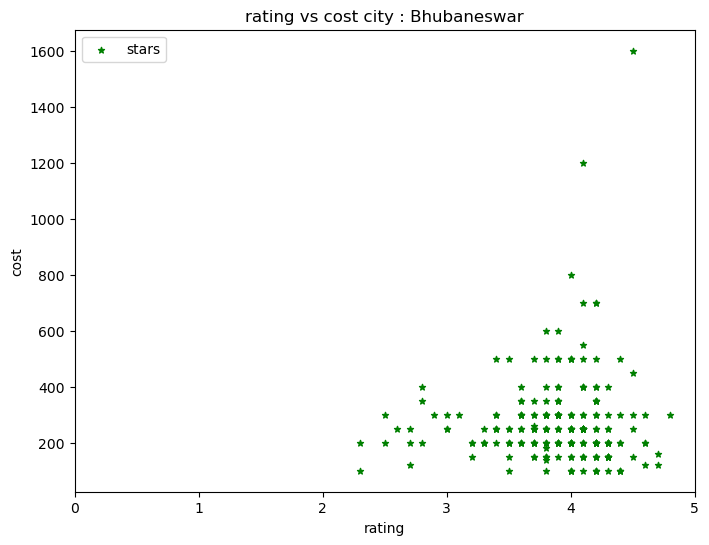

In [86]:
plt.figure(figsize=(8,6)),

#this line should be run onetime only, Once starting over run below line of code
#df['cost'] = df['cost'].str.replace('₹', '').astype(int)

specific_city = "Bhubaneswar"

df1_subset= df[df["city"]== specific_city]

#Below line is sorting by cost for original daraframe that is df not for specific city it will give output for all values in the dataset
# df_sorted = df.sort_values(by='cost')

#Below line is sorting by cost for specific city
df_sorted = df1_subset.sort_values(by='cost')

# x-axis values
x = df_sorted["rating"].values
# y-axis values
y = df_sorted["cost"].values

# plotting points as a scatter plot
plt.scatter(x, y, label= "stars", color= "green",marker= "*", s=20)

# x-axis label
plt.xlabel('rating')
# frequency label
plt.ylabel('cost')
# plot title
plt.title('rating vs cost')

plt.xlim(0, 5)
# plt.ylim(0,10)
#plt.grid(True)

#Adding Title
plt.title(f'rating vs cost city : {specific_city}')

# showing legend
plt.legend()

# function to show the plot
plt.show()


**Emerging Tier 3 City- Vadodara**

In [87]:
df.city.replace(['Vadiwali,Vadodara','Vadodara',],'Vadodara',inplace=True)
df.city.replace(['Akota,Vadodara','Vadodara',],'Vadodara',inplace=True)

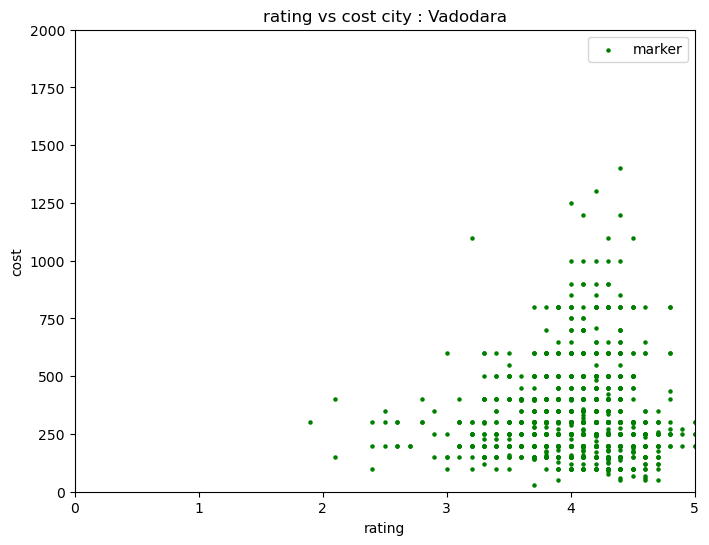

In [88]:
plt.figure(figsize=(8,6)),

#this line should be run onetime only, Once starting over run below line of code
#df['cost'] = df['cost'].str.replace('₹', '').astype(int)

specific_city = "Vadodara"

df1_subset= df[df["city"]== specific_city]

#Below line is sorting by cost for original daraframe that is df not for specific city it will give output for all values in the dataset
# df_sorted = df.sort_values(by='cost')

#Below line is sorting by cost for specific city
df_sorted = df1_subset.sort_values(by='cost')

# x-axis values
x = df_sorted["rating"].values
# y-axis values
y = df_sorted["cost"].values

# plotting points as a scatter plot
plt.scatter(x, y, label= "marker", color= "green", s=5)

# x-axis label
plt.xlabel('rating')
# frequency label
plt.ylabel('cost')
# plot title
plt.title('rating vs cost')

plt.xlim(0, 5)
plt.ylim(0,2000)
#plt.grid(True)

#Adding Title
plt.title(f'rating vs cost city : {specific_city}')

# showing legend
plt.legend()

# function to show the plot
plt.show()



# **Conclusion**

**1.** Total Restaurants =  148398, Total Restaurants that are part of some chain =  46268, Single Outlets = 97630.

**2.** Domino's Pizza, Pizza Hut, KFC, Kwality Walls Frozen Dessert and Ice Cream Shop and Baskin Robbins are the top 5 foodchains from the dataset.

**3.** 24,775 restaurants have given rating 4.1-5.0; 33,502 restaurants have given 3.1-4.0; 2952 restaurants have given 2.1-3.0; 211 restaurants have given 1.1-2.0 and only 1 restaurant have given rating less than 1.

**4.** North Indian, Chinese are the most served/ordered popular cusines.

**5.** Pune and Bangalore, Kochi and Ahmedabad, Bhubaneshwar and Vadodara are the top 2 cities from tier 1, tier 2 and tier 3 most emerging city category respectively. ref: https://www.everestgrp.com/location-strategy/indias-tier-2-and-3-cities-the-next-hotbeds-for-growth-blog.html

**6.** Tier 3 city like Vadodara and Tier 2 city like Ahmedabad have a similar business growth graph like Tier 1 city Pune. So there's a good scalability area to collaborate with more restaurants and cafes in emerging tier 2 and tier 3 cities rather than focusing on tier 1 city.    